In [11]:
import pandas as pd
from pymongo import MongoClient

# Set the path to your Excel file
file_path = '/Users/ravindu/Desktop/Project3/Resources/Stock Markets, US$.xlsx'  # Update this path
stock_data = pd.read_excel(file_path)  # Read the stock data





In [13]:
# Show the first few rows of the dataset to check the structure
print(stock_data.head())


   Unnamed: 0  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0         NaN                   NaN        NaN        NaN       NaN       NaN   
1      1995.0                   NaN        NaN   33.98690  35.29171  52.61066   
2      1996.0                   NaN   23.91518   40.10000  37.32716  62.57487   
3      1997.0                   NaN   31.96844   42.72983  39.26318  72.09075   
4      1998.0                   NaN   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       NaN      NaN                     NaN       NaN  ...        NaN   
1       NaN      NaN                     NaN  10.99475  ...  235.65850   
2       NaN      NaN                     NaN  15.10200  ...  209.35410   
3       NaN      NaN                     NaN  24.86574  ...   93.50412   
4       NaN      NaN                     NaN  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United State

In [14]:


# Clean the data by renaming columns and handling 'NA' values
stock_data_cleaned = stock_data.copy()

# Check if 'Unnamed: 0' is the first column (likely representing years or index)
stock_data_cleaned.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

# Convert the 'Year' column to string (if necessary)
stock_data_cleaned['Year'] = stock_data_cleaned['Year'].astype(str)

# Handle 'NA' values (if you want to fill them with 0 or drop them)
stock_data_cleaned.fillna(0, inplace=True)  # You can replace '0' with other values like 'mean', 'median', etc.

# Check the cleaned data
print(stock_data_cleaned.head())

# If needed, save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data.xlsx', index=False)



     Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0     nan                   0.0    0.00000    0.00000   0.00000   0.00000   
1  1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
2  1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
3  1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
4  1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0   0.00000  ...    0.00000   
1       0.0      0.0                     0.0  10.99475  ...  235.65850   
2       0.0      0.0                     0.0  15.10200  ...  209.35410   
3       0.0      0.0                     0.0  24.86574  ...   93.50412   
4       0.0      0.0                     0.0  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United States  \
0   0.00000   0.000

In [16]:

# Clean the data by renaming columns and handling 'NA' values
stock_data_cleaned = stock_data.copy()

# Remove rows where the first column (Year) is NaN or contains non-year values
stock_data_cleaned = stock_data_cleaned[stock_data_cleaned.iloc[:, 0].notna()]

# Rename the first column to 'Year' (if needed)
stock_data_cleaned.rename(columns={stock_data_cleaned.columns[0]: "Year"}, inplace=True)

# Convert the 'Year' column to integer (if required)
stock_data_cleaned['Year'] = stock_data_cleaned['Year'].astype(int)

# Replace '0.0' with NaN to avoid confusion
stock_data_cleaned.replace(0.0, pd.NA, inplace=True)

# You can also fill missing values if necessary. For example, fill with 0:
# stock_data_cleaned.fillna(0, inplace=True)

# Check the cleaned data
print(stock_data_cleaned.head())

# If needed, save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data.xlsx', index=False)


   Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
1  1995                   NaN        NaN   33.98690  35.29171  52.61066   
2  1996                   NaN   23.91518   40.10000  37.32716  62.57487   
3  1997                   NaN   31.96844   42.72983  39.26318  72.09075   
4  1998                   NaN   23.74431   37.92748  39.90513  96.45048   
5  1999                   NaN   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
1       NaN      NaN                     NaN  10.99475  ...  235.65850   
2       NaN      NaN                     NaN  15.10200  ...  209.35410   
3       NaN      NaN                     NaN  24.86574  ...   93.50412   
4       NaN      NaN                     NaN  20.79932  ...   39.09179   
5       NaN      NaN                     NaN  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
1       NaN  24.71689       83

In [17]:


# Clean the data
stock_data_cleaned = stock_data.copy()

# Replace NaN with 0 for all columns except 'Year'
stock_data_cleaned.iloc[:, 1:] = stock_data_cleaned.iloc[:, 1:].fillna(0)

# Optionally, you can drop rows or columns with NaN if that fits your needs:
# stock_data_cleaned.dropna(axis=0, how='any', inplace=True)  # Drop rows with NaN
# stock_data_cleaned.dropna(axis=1, how='any', inplace=True)  # Drop columns with NaN

# Save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data_filled.xlsx', index=False)

# Show the cleaned data
print(stock_data_cleaned.head())


   Unnamed: 0  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0         NaN                   0.0    0.00000    0.00000   0.00000   0.00000   
1      1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
2      1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
3      1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
4      1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0   0.00000  ...    0.00000   
1       0.0      0.0                     0.0  10.99475  ...  235.65850   
2       0.0      0.0                     0.0  15.10200  ...  209.35410   
3       0.0      0.0                     0.0  24.86574  ...   93.50412   
4       0.0      0.0                     0.0  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United State

In [18]:

# Rename the 'Unnamed: 0' column to 'Year'
stock_data.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

# Remove the first row that contains NaN in the 'Year' column
stock_data = stock_data.dropna(subset=['Year'])

# Reset the index to clean up after dropping rows
stock_data.reset_index(drop=True, inplace=True)

# Optionally, replace NaN values with 0 for all columns except 'Year'
stock_data.iloc[:, 1:] = stock_data.iloc[:, 1:].fillna(0)

# Save the cleaned data to a new Excel file
stock_data.to_excel('cleaned_stock_data.xlsx', index=False)

# Show the cleaned data
print(stock_data.head())


     Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0  1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
1  1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
2  1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
3  1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   
4  1999.0                   0.0   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0  10.99475  ...  235.65850   
1       0.0      0.0                     0.0  15.10200  ...  209.35410   
2       0.0      0.0                     0.0  24.86574  ...   93.50412   
3       0.0      0.0                     0.0  20.79932  ...   39.09179   
4       0.0      0.0                     0.0  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
0   0.00000  24.71

In [19]:
import pandas as pd

# Load the Excel file and sheet into a DataFrame
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Display the first few rows of the dataframe to inspect the data
print(df.head())


   Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0  1995                   0.0    0.00000   33.98690  35.29171  52.61066   
1  1996                   0.0   23.91518   40.10000  37.32716  62.57487   
2  1997                   0.0   31.96844   42.72983  39.26318  72.09075   
3  1998                   0.0   23.74431   37.92748  39.90513  96.45048   
4  1999                   0.0   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0  10.99475  ...  235.65850   
1       0.0      0.0                     0.0  15.10200  ...  209.35410   
2       0.0      0.0                     0.0  24.86574  ...   93.50412   
3       0.0      0.0                     0.0  20.79932  ...   39.09179   
4       0.0      0.0                     0.0  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
0   0.00000  24.71689       83

In [20]:
# Check for missing values in the dataframe
missing_data = df.isnull().sum()
print(missing_data)

# Option 1: Fill missing values with 0
df.fillna(0, inplace=True)

# Option 2: Alternatively, you can fill missing values with the mean of each column (if required)
# df.fillna(df.mean(), inplace=True)

# Check again for missing values after handling
missing_data_after = df.isnull().sum()
print(missing_data_after)


Year                    0
United Arab Emirates    0
Argentina               0
Australia               0
Austria                 0
                       ..
Ukraine                 0
United States           0
Venezuela, RB           0
Viet Nam                0
South Africa            0
Length: 79, dtype: int64
Year                    0
United Arab Emirates    0
Argentina               0
Australia               0
Austria                 0
                       ..
Ukraine                 0
United States           0
Venezuela, RB           0
Viet Nam                0
South Africa            0
Length: 79, dtype: int64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Filter data for the year 2009
df_2009 = df[df['Year'] == 2009]

# Show the filtered dataframe to check the results
print(df_2009.head())


    Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
14  2009              106.6436    69.3786   73.60899  80.66908  83.35619   

    Bulgaria   Bahrain  Bosnia and Herzegovina    Brazil  ...  Thailand  \
14  86.50294  106.9228                112.0967  70.79969  ...  77.37459   

     Tunisia    Turkey  Taiwan, China    Uganda   Ukraine  United States  \
14  77.96128  66.13794       76.46217  89.16151  68.10577       84.76696   

    Venezuela, RB  Viet Nam  South Africa  
14            0.0  88.08797      76.32392  

[1 rows x 79 columns]


In [23]:
# Calculate mean, median, and standard deviation for each country's stock values
stats = df.describe().T[['mean', '50%', 'std']]  # '50%' represents the median
stats.rename(columns={'50%': 'median'}, inplace=True)

# Display the statistics
print(stats)


                             mean       median           std
Year                  2009.500000  2009.500000      8.803408
United Arab Emirates   116.566401   119.144800    102.884657
Argentina             3311.193641    99.166260  11978.204003
Australia               81.773975    95.119670     30.976337
Austria                 77.787449    83.355950     35.566074
...                           ...          ...           ...
Ukraine                 49.704468    24.775850     57.371718
United States          154.544644   111.615400     91.015480
Venezuela, RB            5.340616     0.000000     29.026156
Viet Nam                94.461894    90.887340     65.991994
South Africa            73.215290    92.323995     48.060372

[79 rows x 3 columns]


In [24]:
# Recalculate the mean, median, and standard deviation for each country in 2009
df_2009_stats = df_2009.drop(columns='Year').agg(['mean', 'median', 'std'])

# Transpose to have countries as rows
df_2009_stats = df_2009_stats.transpose()

# Show the statistics
print(df_2009_stats)


                           mean     median  std
United Arab Emirates  106.64360  106.64360  NaN
Argentina              69.37860   69.37860  NaN
Australia              73.60899   73.60899  NaN
Austria                80.66908   80.66908  NaN
Belgium                83.35619   83.35619  NaN
...                         ...        ...  ...
Ukraine                68.10577   68.10577  NaN
United States          84.76696   84.76696  NaN
Venezuela, RB           0.00000    0.00000  NaN
Viet Nam               88.08797   88.08797  NaN
South Africa           76.32392   76.32392  NaN

[78 rows x 3 columns]


In [41]:
# Recalculate the mean and median for each country in 2009 (without std)
df_2009_stats = df_2009.drop(columns='Year').agg(['mean', 'median'])

# Transpose to have countries as rows
df_2009_stats = df_2009_stats.transpose()

# Show the statistics
print(df_2009_stats)


                           mean     median
United Arab Emirates  106.64360  106.64360
Argentina              69.37860   69.37860
Australia              73.60899   73.60899
Austria                80.66908   80.66908
Belgium                83.35619   83.35619
...                         ...        ...
Ukraine                68.10577   68.10577
United States          84.76696   84.76696
Venezuela, RB           0.00000    0.00000
Viet Nam               88.08797   88.08797
South Africa           76.32392   76.32392

[78 rows x 2 columns]


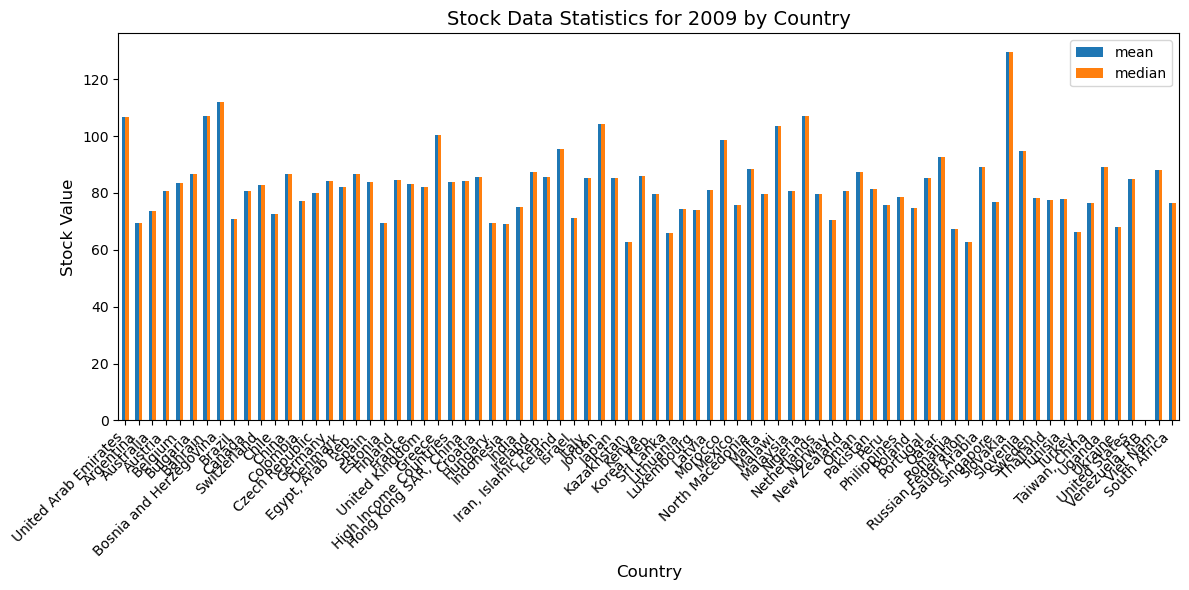

In [42]:
# Plotting the mean and median for the year 2009 (without std)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean and median as a bar chart (remove 'std')
df_2009_stats[['mean', 'median']].plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Stock Data Statistics for 2009 by Country', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Stock Value', fontsize=12)
ax.set_xticklabels(df_2009_stats.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
#steps to Filter and Plot Top 5 Highest and Lowest Countries:
#1. Sort Countries by the Chosen Metric (e.g., Mean)

#We will first sort the data for 2009 based on the mean stock value and then select the top 5 highest and top 5 lowest.

In [26]:
# Sort by mean stock value for 2009 (ascending to get lowest first)
sorted_by_mean_2009 = df_2009_stats['mean'].sort_values(ascending=False)

# Get the top 5 highest and top 5 lowest countries
top_5_highest = sorted_by_mean_2009.head(5)
top_5_lowest = sorted_by_mean_2009.tail(5)

# Show the top 5 highest and lowest countries based on the mean
print("Top 5 Highest Countries:")
print(top_5_highest)

print("\nTop 5 Lowest Countries:")
print(top_5_lowest)


Top 5 Highest Countries:
Slovakia                  129.6691
Bosnia and Herzegovina    112.0967
Bahrain                   106.9228
Nigeria                   106.9129
United Arab Emirates      106.6436
Name: mean, dtype: float64

Top 5 Lowest Countries:
Turkey                66.13794
Sri Lanka             65.86170
Russian Federation    62.72740
Kazakhstan            62.69666
Venezuela, RB          0.00000
Name: mean, dtype: float64


In [32]:
# Check the column names of the DataFrame
print(df_2009.columns)


Index(['Year', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Brazil',
       'Canada', 'Switzerland', 'Chile', 'China', 'Colombia', 'Czech Republic',
       'Germany', 'Denmark', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Finland',
       'France', 'United Kingdom', 'Greece', 'High Income Countries',
       'Hong Kong SAR, China', 'Croatia', 'Hungary', 'Indonesia', 'India',
       'Ireland', 'Iran, Islamic Rep.', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Sri Lanka', 'Lithuania',
       'Luxembourg', 'Latvia', 'Morocco', 'Mexico', 'North Macedonia', 'Malta',
       'Malawi', 'Malaysia', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand',
       'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'Sweden', 'Thailand', 'Tunisia', 'Turkey'

In [43]:
# List of the top 5 highest and lowest countries (these should be the actual country names)
top_5_highest = ['Slovakia', 'Bosnia and Herzegovina', 'Bahrain', 'Nigeria', 'United Arab Emirates']
top_5_lowest = ['Turkey', 'Sri Lanka', 'Russian Federation', 'Kazakhstan', 'Venezuela, RB']

# Step 2: Filter the data for these countries
df_filtered = df_2009[['Year'] + top_5_highest + top_5_lowest]

# Step 3: Calculate statistics (mean, median) for the filtered countries (without std)
statistics = df_filtered.drop(columns='Year').agg(['mean', 'median']).transpose()

# Display the statistics
print(statistics)


                             mean     median
Slovakia                129.66910  129.66910
Bosnia and Herzegovina  112.09670  112.09670
Bahrain                 106.92280  106.92280
Nigeria                 106.91290  106.91290
United Arab Emirates    106.64360  106.64360
Turkey                   66.13794   66.13794
Sri Lanka                65.86170   65.86170
Russian Federation       62.72740   62.72740
Kazakhstan               62.69666   62.69666
Venezuela, RB             0.00000    0.00000


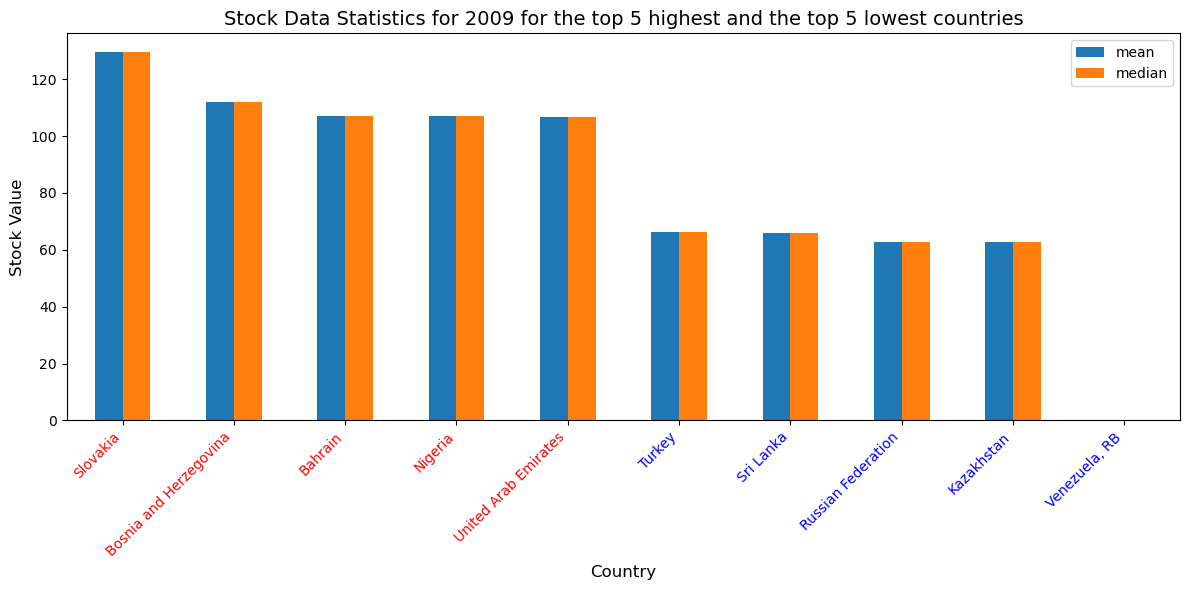

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define the top 5 highest and lowest countries based on the mean stock value
top_5_highest = ['Slovakia', 'Bosnia and Herzegovina', 'Bahrain', 'Nigeria', 'United Arab Emirates']
top_5_lowest = ['Turkey', 'Sri Lanka', 'Russian Federation', 'Kazakhstan', 'Venezuela, RB']

# Filter the data for these countries only
df_filtered = df_2009[['Year'] + top_5_highest + top_5_lowest]

# Step 1: Calculate the statistics (mean, median) for the filtered data
df_2009_stats = df_filtered.drop(columns='Year').agg(['mean', 'median']).transpose()

# Step 2: Plotting the mean and median for the selected countries
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each statistic (mean, median) as a bar chart
df_2009_stats[['mean', 'median']].plot(kind='bar', ax=ax)

# Highlighting the country names by changing their color in the x-axis labels
for tick, label in zip(range(len(df_2009_stats.index)), ax.get_xticklabels()):
    country_name = df_2009_stats.index[tick]
    if country_name in top_5_highest:
        label.set_color('red')  # Color for top countries
    elif country_name in top_5_lowest:
        label.set_color('blue')  # Color for lowest countries

# Customize the plot
ax.set_title('Stock Data Statistics for 2009 for the top 5 highest and the top 5 lowest countries', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Stock Value', fontsize=12)
ax.set_xticklabels(df_2009_stats.index, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
# List of the custom selected countries 
selected_countries = ['Ireland', 'United Kingdom', 'Canada', 'Australia', 'Germany', 
                      'France', 'India', 'Sri Lanka', 'Bahrain']

# Step 2: Filter the data for these selected countries
df_filtered = df_2009[['Year'] + selected_countries]

# Step 3: Calculate statistics (mean, median) for the filtered countries (without std)
statistics = df_filtered.drop(columns='Year').agg(['mean', 'median']).transpose()

# Display the statistics
print(statistics)


                     mean     median
Ireland          87.30503   87.30503
United Kingdom   81.92638   81.92638
Canada           80.62024   80.62024
Australia        73.60899   73.60899
Germany          84.03792   84.03792
France           83.27729   83.27729
India            75.22021   75.22021
Sri Lanka        65.86170   65.86170
Bahrain         106.92280  106.92280


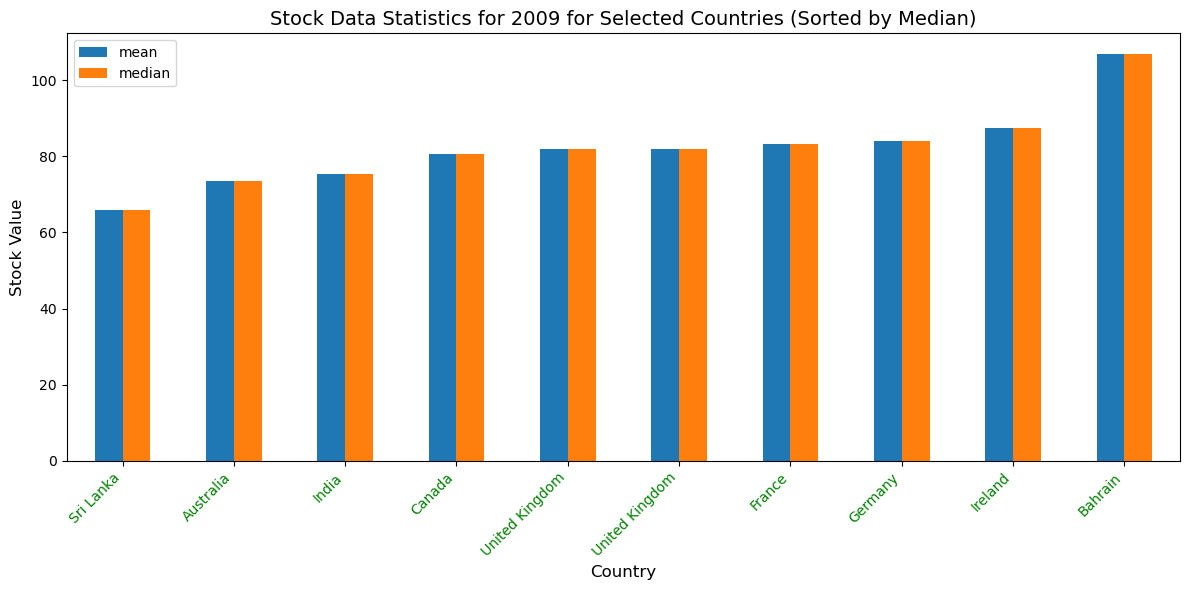

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define your custom list of countries
selected_countries = ['Ireland', 'United Kingdom', 'Canada', 'Australia', 'Germany', 
                      'France', 'United Kingdom', 'India', 'Sri Lanka', 'Bahrain']

# Filter the data for these countries only
df_filtered = df_2009[['Year'] + selected_countries]

# Step 1: Calculate the statistics (mean, median) for the filtered data
df_2009_stats = df_filtered.drop(columns='Year').agg(['mean', 'median']).transpose()

# Step 2: Reorder the countries based on the median values (from lowest to highest)
df_2009_stats_sorted = df_2009_stats.sort_values(by='median', ascending=True)

# Step 3: Plotting the mean and median for the selected countries (sorted)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each statistic (mean, median) as a bar chart
df_2009_stats_sorted[['mean', 'median']].plot(kind='bar', ax=ax)

# Highlighting the country names by changing their color in the x-axis labels
for tick, label in zip(range(len(df_2009_stats_sorted.index)), ax.get_xticklabels()):
    country_name = df_2009_stats_sorted.index[tick]
    if country_name in selected_countries:
        label.set_color('green')  # Color for the selected countries

# Customize the plot
ax.set_title('Stock Data Statistics for 2009 for Selected Countries (Sorted by Median)', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Stock Value', fontsize=12)
ax.set_xticklabels(df_2009_stats_sorted.index, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
